In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

In [54]:
data = pd.read_csv('../practical8/IPG2211A2N.csv', index_col='DATE', parse_dates=True)
data

,IPG2211A2N
DATE,
1939-01-01,3.3336
1939-01-02,3.3591
1939-01-03,3.4354
1939-01-04,3.4608
1939-01-05,3.4608
...,...
2024-01-03,98.3225
2024-01-04,90.4548
2024-01-05,95.6632


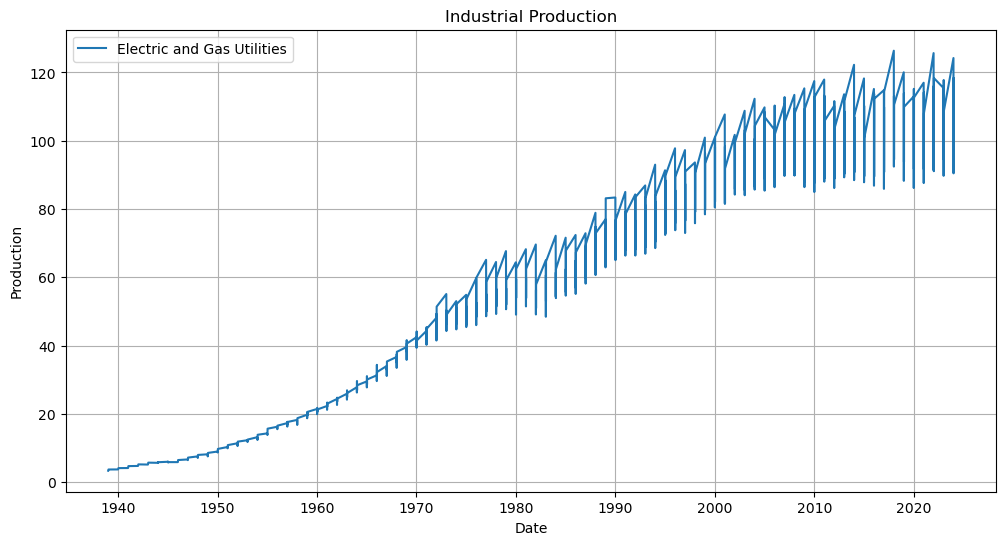

In [55]:
# Raw Data
plt.figure(figsize=(12, 6))
plt.plot(data, label="Electric and Gas Utilities")
plt.title("Industrial Production")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

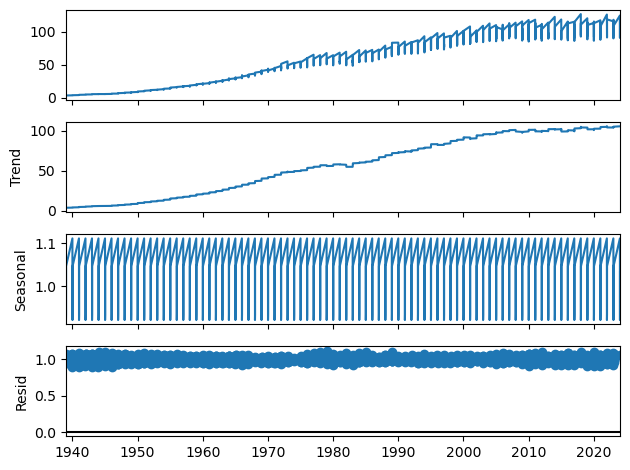

In [56]:
# Trend and Seasonal Variation
plt.figure(figsize=(12, 6))
decompose_result = seasonal_decompose(data, model="multiplicative", period=12)
decompose_result.plot()
plt.show()

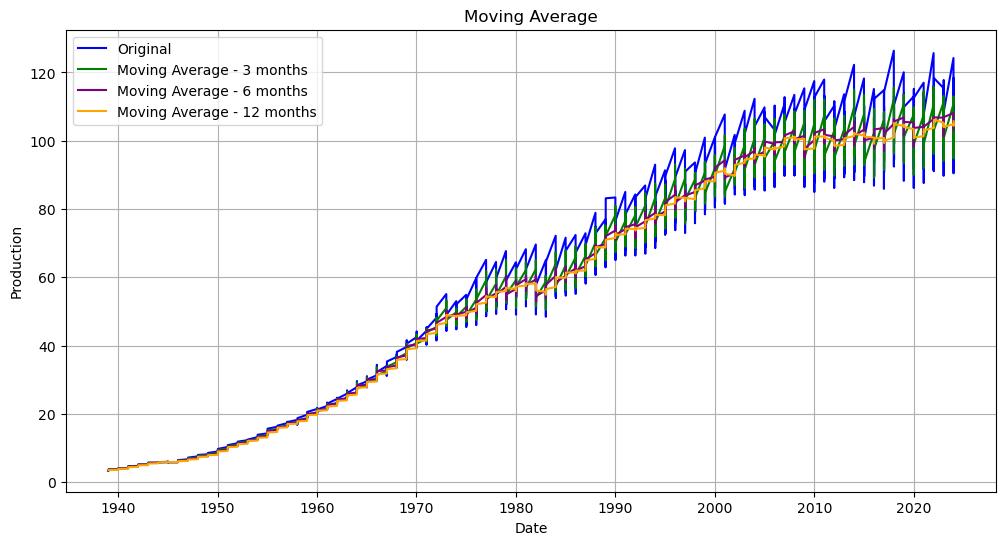

In [58]:
# Moving Average
data1 = data.copy()
plt.figure(figsize=(12, 6))
plt.plot(data1, label="Original", color="blue")

data1["MA_3"] = data1["IPG2211A2N"].rolling(window=3).mean()
data1["MA_6"] = data1["IPG2211A2N"].rolling(window=6).mean()
data1["MA_12"] = data1["IPG2211A2N"].rolling(window=12).mean()

plt.plot(data1["MA_3"], label="Moving Average - 3 months", color="green")
plt.plot(data1["MA_6"], label="Moving Average - 6 months", color="purple")
plt.plot(data1["MA_12"], label="Moving Average - 12 months", color="orange")

plt.title("Moving Average")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.grid()
plt.show()

In [59]:
data1

,IPG2211A2N,MA_3,MA_6,MA_12
DATE,,,,
1939-01-01,3.3336,NaN,NaN,NaN
1939-01-02,3.3591,NaN,NaN,NaN
1939-01-03,3.4354,3.376033,NaN,NaN
1939-01-04,3.4608,3.418433,NaN,NaN
1939-01-05,3.4608,3.452333,NaN,NaN
...,...,...,...,...
2024-01-03,98.3225,109.560167,105.225533,104.381292
2024-01-04,90.4548,98.300933,104.544300,104.441792
2024-01-05,95.6632,94.813500,103.909683,104.763950


In [63]:
# Forecasting - Prediction
train = data[:'2019']
test = data['2020':]

In [64]:
train

,IPG2211A2N
DATE,
1939-01-01,3.3336
1939-01-02,3.3591
1939-01-03,3.4354
1939-01-04,3.4608
1939-01-05,3.4608
...,...
2019-01-08,112.3547
2019-01-09,103.1333
2019-01-10,93.8206


In [66]:
test.head()

,IPG2211A2N
DATE,
2020-01-01,112.9689
2020-01-02,106.6252
2020-01-03,96.5893
2020-01-04,86.1592
2020-01-05,87.3142


In [67]:
test.tail()

,IPG2211A2N
DATE,
2024-01-03,98.3225
2024-01-04,90.4548
2024-01-05,95.6632
2024-01-06,110.7447
2024-01-07,118.2783


In [79]:
model = SimpleExpSmoothing(train).fit(smoothing_level=0.2, optimized=True)
forecast = model.forecast(steps=len(test))

C:\Users\harsh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\harsh\miniconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\harsh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\harsh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


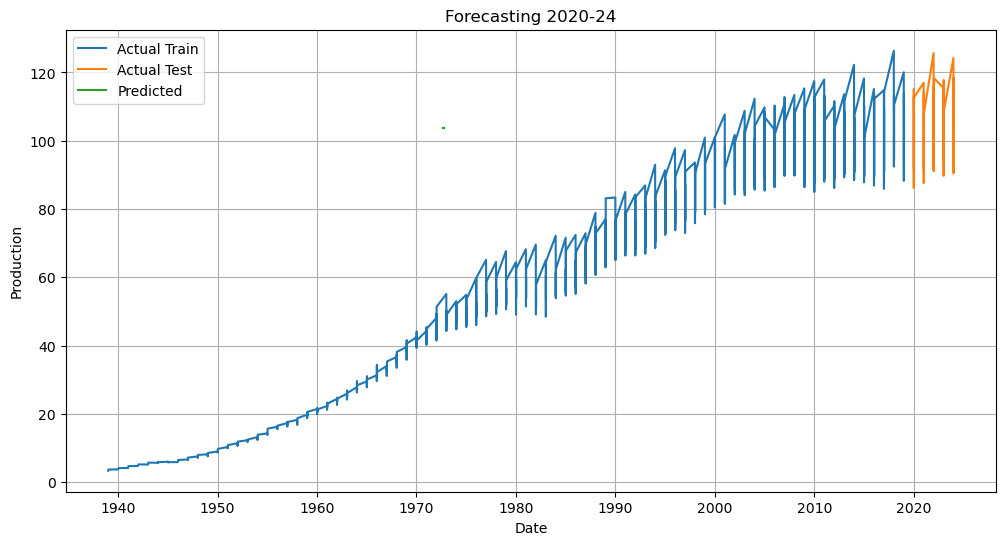

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(train, label="Actual Train")
plt.plot(test, label="Actual Test")
plt.plot(forecast, label="Predicted")

plt.title("Forecasting 2020-24")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("../practical9/CarPrice_Assignment.csv")

In [36]:
X_citympg = df["horsepower"]
y_citympg = df["citympg"]

In [37]:
X_citympg

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64

In [38]:
y_citympg

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: citympg, Length: 205, dtype: int64

In [39]:
X_citympg = sm.add_constant(X_citympg)
X_citympg

,const,horsepower
0,1.0,111
1,1.0,111
2,1.0,154
3,1.0,102
4,1.0,115
...,...,...
200,1.0,114
201,1.0,160
202,1.0,134
203,1.0,106


In [40]:
model_citympg = sm.OLS(y_citympg, X_citympg).fit()
model_citympg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                citympg   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     364.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           3.32e-47
Time:                        16:33:30   Log-Likelihood:                -570.04
No. Observations:                 205   AIC:                             1144.
Df Residuals:                     203   BIC:                             1151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0246      0.773     50.473      0.000      37.500      40.549
horsepower    -0.1326      0.007    -19.094      0.000      -0.146      -0.119
==============================================================================
Omnibus:                       62.125   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.205
Skew:                           1.258   Prob(JB):                     6.07e-41
Kurtosis:                       6.918   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
y_p_citympg = model_citympg.predict(X_citympg)

In [42]:
X_highwaympg = df["horsepower"]
y_highwaympg = df["highwaympg"]

In [43]:
X_highwaympg

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64

In [44]:
y_highwaympg

0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highwaympg, Length: 205, dtype: int64

In [45]:
X_highwaympg = sm.add_constant(X_highwaympg)
X_highwaympg

,const,horsepower
0,1.0,111
1,1.0,111
2,1.0,154
3,1.0,102
4,1.0,115
...,...,...
200,1.0,114
201,1.0,160
202,1.0,134
203,1.0,106


In [46]:
model_highwaympg = sm.OLS(y_highwaympg, X_highwaympg).fit()
model_highwaympg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             highwaympg   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     296.7
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.42e-41
Time:                        16:33:34   Log-Likelihood:                -593.61
No. Observations:                 205   AIC:                             1191.
Df Residuals:                     203   BIC:                             1198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.7224      0.867     51.559      0.000      43.012      46.433
horsepower    -0.1342      0.008    -17.224      0.000      -0.150      -0.119
==============================================================================
Omnibus:                       60.726   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.173
Skew:                           1.220   Prob(JB):                     1.02e-40
Kurtosis:                       6.950   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
y_p_highwaympg = model_highwaympg.predict(X_highwaympg)

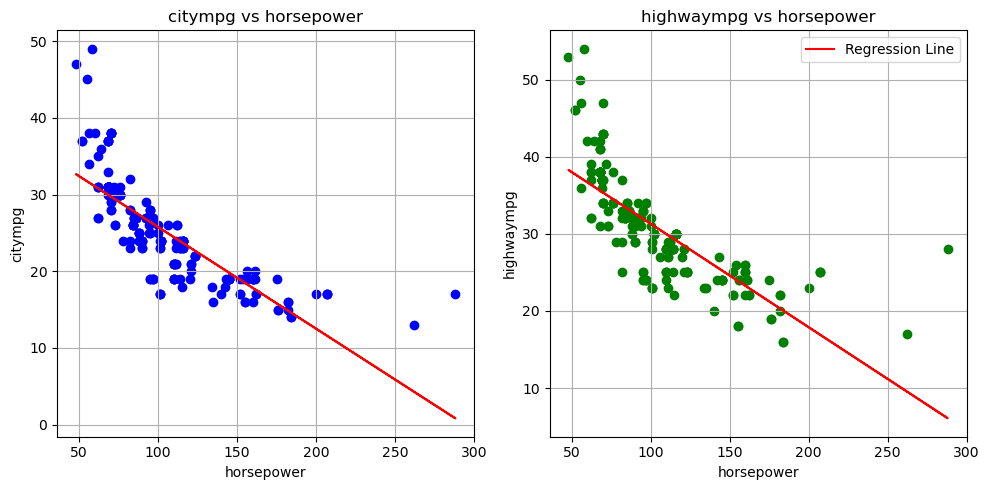

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(x=df["horsepower"], y=df["citympg"], color='blue')
axs[0].plot(df["horsepower"], y_p_citympg, color="red",label="Regression Line")
axs[0].set_title("citympg vs horsepower")
axs[0].set_xlabel("horsepower")
axs[0].set_ylabel("citympg")
axs[0].grid()

axs[1].scatter(x=df["horsepower"], y=df["highwaympg"], color='green')
axs[1].plot(df["horsepower"], y_p_highwaympg, color="red",label="Regression Line")
axs[1].set_title("highwaympg vs horsepower")
axs[1].set_xlabel("horsepower")
axs[1].set_ylabel("highwaympg")
axs[1].grid()

plt.legend()
plt.tight_layout()
plt.show()